# 获取数据

In [139]:
import pandas_ta as ta
import numpy as np
import pandas as pd

In [140]:
daily_300 = pd.read_csv("000300.csv", header=0, names=[ "trade_date",  "high", "low","close", "pct_chg"]).sort_values('trade_date').reset_index()
daily_300

,index,trade_date,high,low,close,pct_chg
0,4422,20050104,994.77,980.66,982.79,-1.72
1,4421,20050105,997.32,979.88,992.56,0.99
2,4420,20050106,993.79,980.33,983.17,-0.95
3,4419,20050107,995.71,979.81,983.96,0.08
4,4418,20050110,993.96,979.79,993.88,1.01
...,...,...,...,...,...,...
4418,4,20230313,4008.69,3962.64,4008.69,1.05
4419,3,20230314,4001.94,3946.94,3984.70,-0.60
4420,2,20230315,4018.75,3986.90,3986.90,0.06
4421,1,20230316,3981.32,3936.48,3939.15,-1.20


# 计算指标
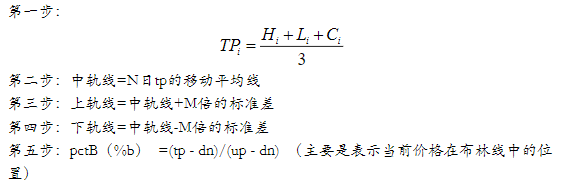

In [141]:
import pandas_ta as ta
import numpy as np
import pandas as pd

In [142]:
def calc_BBand(mkt_data, n=20, m=2):
    close = mkt_data['close']
    high = mkt_data['high']
    low = mkt_data['low']
    """ 指标计算 """
    TP = (high+low+close)/3
    MID = TP.rolling(n).mean()
    BANDUP = MID + m*TP.rolling(n).std()
    BANDDOWN = MID - m*TP.rolling(n).std()
    """ 结果赋值 """
    mkt_data['MID'] = MID
    mkt_data['BANDUP'] = BANDUP
    mkt_data['BANDDOWN'] = BANDDOWN    
    return mkt_data

In [143]:
daily_300 = calc_BBand(daily_300)
daily_300[:20]

,index,trade_date,high,low,close,pct_chg,MID,BANDUP,BANDDOWN
0,4422,20050104,994.77,980.66,982.79,-1.72,NaN,NaN,NaN
1,4421,20050105,997.32,979.88,992.56,0.99,NaN,NaN,NaN
2,4420,20050106,993.79,980.33,983.17,-0.95,NaN,NaN,NaN
3,4419,20050107,995.71,979.81,983.96,0.08,NaN,NaN,NaN
4,4418,20050110,993.96,979.79,993.88,1.01,NaN,NaN,NaN
5,4417,20050111,999.55,991.09,997.14,0.33,NaN,NaN,NaN
6,4416,20050112,996.98,989.26,996.75,-0.04,NaN,NaN,NaN
7,4415,20050113,999.47,992.70,996.88,0.01,NaN,NaN,NaN
8,4414,20050114,1006.46,987.23,988.31,-0.86,NaN,NaN,NaN
9,4413,20050117,981.53,965.08,967.45,-2.11,NaN,NaN,NaN


# 计算信号
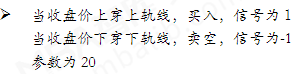

In [144]:
def calc_signal(mkt_data):
    BANDUP = mkt_data['BANDUP']
    BANDDOWN = mkt_data['BANDDOWN']
    close = mkt_data['close']
    """ 计算信号 """
    signals = []
    for bup, bdown, close, pre_bup, pre_bdown, pre_close in zip(BANDUP, BANDDOWN, close, BANDUP.shift(1), BANDDOWN.shift(1),close.shift(1)):
        signal = None
        if pre_close<pre_bup and close>=bup:
            signal = 1
        elif pre_close>=pre_bdown and close<bdown:
            signal = -1
        signals.append(signal)
    mkt_data['signal'] = signals
    return mkt_data

In [145]:
daily_300 = calc_signal(daily_300)
daily_300

,index,trade_date,high,low,close,pct_chg,MID,BANDUP,BANDDOWN,signal
0,4422,20050104,994.77,980.66,982.79,-1.72,NaN,NaN,NaN,NaN
1,4421,20050105,997.32,979.88,992.56,0.99,NaN,NaN,NaN,NaN
2,4420,20050106,993.79,980.33,983.17,-0.95,NaN,NaN,NaN,NaN
3,4419,20050107,995.71,979.81,983.96,0.08,NaN,NaN,NaN,NaN
4,4418,20050110,993.96,979.79,993.88,1.01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4418,4,20230313,4008.69,3962.64,4008.69,1.05,4081.745000,4178.192667,3985.297333,NaN
4419,3,20230314,4001.94,3946.94,3984.70,-0.60,4073.594667,4176.349754,3970.839580,NaN
4420,2,20230315,4018.75,3986.90,3986.90,0.06,4066.914167,4171.280664,3962.547670,NaN
4421,1,20230316,3981.32,3936.48,3939.15,-1.20,4059.025833,4173.055590,3944.996076,-1.0


# 计算持仓

In [146]:
def calc_position(mkt_data):
    mkt_data['position'] = mkt_data['signal'].fillna(method='ffill').shift(1).fillna(0)
    return mkt_data

In [147]:
daily_300 = calc_position(daily_300)
daily_300

,index,trade_date,high,low,close,pct_chg,MID,BANDUP,BANDDOWN,signal,position
0,4422,20050104,994.77,980.66,982.79,-1.72,NaN,NaN,NaN,NaN,0.0
1,4421,20050105,997.32,979.88,992.56,0.99,NaN,NaN,NaN,NaN,0.0
2,4420,20050106,993.79,980.33,983.17,-0.95,NaN,NaN,NaN,NaN,0.0
3,4419,20050107,995.71,979.81,983.96,0.08,NaN,NaN,NaN,NaN,0.0
4,4418,20050110,993.96,979.79,993.88,1.01,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4418,4,20230313,4008.69,3962.64,4008.69,1.05,4081.745000,4178.192667,3985.297333,NaN,-1.0
4419,3,20230314,4001.94,3946.94,3984.70,-0.60,4073.594667,4176.349754,3970.839580,NaN,-1.0
4420,2,20230315,4018.75,3986.90,3986.90,0.06,4066.914167,4171.280664,3962.547670,NaN,-1.0
4421,1,20230316,3981.32,3936.48,3939.15,-1.20,4059.025833,4173.055590,3944.996076,-1.0,-1.0


# 计算结果

In [148]:
def statistic_performance(mkt_data, r0=0.03, data_period=1440):
    position = mkt_data['position']
    
    """      序列型特征 
        hold_r :      持仓收益
        hold_win :    持仓胜负
        hold_cumu_r : 累计持仓收益
        drawdown :    回撤
        ex_hold_r :   超额收益
    """
    hold_r = mkt_data['pct_chg']/100 * position
    hold_win = hold_r>0
    hold_cumu_r = (1+hold_r).cumprod() - 1
    drawdown = (hold_cumu_r.cummax()-hold_cumu_r)/(1+hold_cumu_r).cummax()    
    ex_hold_r= hold_r-r0/(250*1440/data_period)

    mkt_data['hold_r'] = hold_r
    mkt_data['hold_win'] = hold_win
    mkt_data['hold_cumu_r'] = hold_cumu_r
    mkt_data['drawdown'] = drawdown
    mkt_data['ex_hold_r'] = ex_hold_r
    
    """       数值型特征 
        v_hold_cumu_r：         累计持仓收益
        v_pos_hold_times：      多仓开仓次数
        v_pos_hold_win_times：  多仓开仓盈利次数
        v_pos_hold_period：     多仓持有周期数
        v_pos_hold_win_period： 多仓持有盈利周期数
        v_neg_hold_times：      空仓开仓次数
        v_neg_hold_win_times：  空仓开仓盈利次数
        v_neg_hold_period：     空仓持有盈利周期数
        v_neg_hold_win_period： 空仓开仓次数
        v_hold_period：         持仓周期数（最后一笔未平仓订单也算）
        v_hold_win_period：     持仓盈利周期数（最后一笔未平仓订单也算）
        v_max_dd：              最大回撤
        v_annual_std：          年化标准差
        v_annual_ret：          年化收益
        v_sharpe：              夏普率
    """
    v_hold_cumu_r = hold_cumu_r.tolist()[-1]

    v_pos_hold_times= 0 
    v_pos_hold_win_times = 0
    v_pos_hold_period = 0
    v_pos_hold_win_period = 0
    v_neg_hold_times= 0 
    v_neg_hold_win_times = 0
    v_neg_hold_period = 0
    v_neg_hold_win_period = 0
    for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
        # 有换仓（先结算上一次持仓，再初始化本次持仓）
        if pre_pos!=pos: 
            # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
            if pre_pos == pre_pos:
                # 结算上一次持仓
                if pre_pos>0:
                    v_pos_hold_times += 1
                    v_pos_hold_period += tmp_hold_period
                    v_pos_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:
                        v_pos_hold_win_times+=1
                elif pre_pos<0:
                    v_neg_hold_times += 1      
                    v_neg_hold_period += tmp_hold_period
                    v_neg_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:                    
                        v_neg_hold_win_times+=1
            # 初始化本次持仓
            tmp_hold_r = r
            tmp_hold_period = 0
            tmp_hold_win_period = 0
        else: # 未换仓
            if abs(pos)>0:
                tmp_hold_period += 1
                if r>0:
                    tmp_hold_win_period += 1
                if abs(r)>0:
                    tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       

    v_hold_period = (abs(position)>0).sum()
    v_hold_win_period = (hold_r>0).sum()
    v_max_dd = drawdown.max()    
    v_annual_ret = pow( 1+v_hold_cumu_r, 
                      1/(data_period/1440*len(mkt_data)/250) )-1
    v_annual_std = ex_hold_r.std() * np.sqrt(250*1440/data_period) 
    v_sharpe= v_annual_ret / v_annual_std

    """ 生成Performance DataFrame """
    performance_cols = ['累计收益', 
                        '多仓次数', '多仓胜率', '多仓平均持有期', 
                        '空仓次数', '空仓胜率', '空仓平均持有期', 
                        '日胜率', '最大回撤', '年化收益/最大回撤',
                        '年化收益', '年化标准差', '年化夏普'
                       ]
    performance_values = ['{:.2%}'.format(v_hold_cumu_r),
                          v_pos_hold_times, '{:.2%}'.format(v_pos_hold_win_times/v_pos_hold_times), 
                                            '{:.2f}'.format(v_pos_hold_period/v_pos_hold_times),
                          v_neg_hold_times, '{:.2%}'.format(v_neg_hold_win_times/v_neg_hold_times), 
                                            '{:.2f}'.format(v_neg_hold_period/v_neg_hold_times),
                          '{:.2%}'.format(v_hold_win_period/v_hold_period), 
                          '{:.2%}'.format(v_max_dd), 
                          '{:.2f}'.format(v_annual_ret/v_max_dd),
                          '{:.2%}'.format(v_annual_ret), 
                          '{:.2%}'.format(v_annual_std), 
                          '{:.2f}'.format(v_sharpe)
                         ]
    performance_df = pd.DataFrame(performance_values, index=performance_cols)
    return mkt_data, performance_df

# 可视化结果

In [149]:
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [150]:
def visualize_performance(mkt_data):
    mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
    dt = mkt_data['trade_datetime']

    f1 = figure(height=300, width=700, 
                sizing_mode='stretch_width', 
                title='Target Trend',
                x_axis_type='datetime',
                x_axis_label="trade_datetime", y_axis_label="close")
    f2 = figure(height=200, sizing_mode='stretch_width', 
                title='Position',
                x_axis_label="trade_datetime", y_axis_label="position",
                x_axis_type='datetime',
                x_range=f1.x_range)
    f3 = figure(height=200, sizing_mode='stretch_width', 
                title='Return',
                x_axis_type='datetime',
                x_range=f1.x_range)
    f4 = figure(height=200, sizing_mode='stretch_width', 
                title='Drawdown',
                x_axis_type='datetime',
                x_range=f1.x_range)

    # 绘制行情
    close = mkt_data['close']
    cumu_hold_close = (mkt_data['hold_cumu_r']+1)
    f1.line(dt, close/close.tolist()[0], line_width=1)
    f1.line(dt, cumu_hold_close, line_width=1, color='red')

    # 绘制指标
#     indi = figure(height=200, sizing_mode='stretch_width', 
#                   title='KDJ',
#                   x_axis_type='datetime',
#                   x_range=f1.x_range
#                  )
    
    # 绘制仓位
    position = mkt_data['position']
    f2.step(dt, position)

    # 绘制收益
    hold_r = mkt_data['hold_r']
    f3.vbar(x=dt, top=hold_r)

    # 绘制回撤
    drawdown = mkt_data['drawdown']
    f4.line(dt, -drawdown, line_width=1)

    #p = column(f1,f2,f3,f4)
    p = gridplot([ [f1],
                   #[indi],
                   [f2], 
                   [f3],
                   [f4]
                 ])
    show(p)

In [151]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>=20050901 and x<=20120315)])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>=20120315)])

result_daily_300
visualize_performance(result_daily_300)
print(performance_df)

C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

                 0
累计收益       117.73%
多仓次数            29
多仓胜率        55.17%
多仓平均持有期      49.03
空仓次数            28
空仓胜率        46.43%
空仓平均持有期      42.04
日胜率         50.75%
最大回撤        31.35%
年化收益/最大回撤     0.24
年化收益         7.54%
年化标准差       22.23%
年化夏普          0.34


# 整体执行

In [152]:
daily_300 = calc_BBand(daily_300, n=14)
daily_300 = calc_signal(daily_300)
daily_300 = calc_position(daily_300)
daily_300

,index,trade_date,high,low,close,pct_chg,MID,BANDUP,BANDDOWN,signal,position
0,4422,20050104,994.77,980.66,982.79,-1.72,NaN,NaN,NaN,NaN,0.0
1,4421,20050105,997.32,979.88,992.56,0.99,NaN,NaN,NaN,NaN,0.0
2,4420,20050106,993.79,980.33,983.17,-0.95,NaN,NaN,NaN,NaN,0.0
3,4419,20050107,995.71,979.81,983.96,0.08,NaN,NaN,NaN,NaN,0.0
4,4418,20050110,993.96,979.79,993.88,1.01,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4418,4,20230313,4008.69,3962.64,4008.69,1.05,4068.336667,4165.764374,3970.908960,NaN,-1.0
4419,3,20230314,4001.94,3946.94,3984.70,-0.60,4058.572143,4163.179531,3953.964755,NaN,-1.0
4420,2,20230315,4018.75,3986.90,3986.90,0.06,4050.674524,4155.873227,3945.475821,NaN,-1.0
4421,1,20230316,3981.32,3936.48,3939.15,-1.20,4042.223333,4158.899071,3925.547595,NaN,-1.0


In [157]:
# 评价和展现
result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>=20050901 and x<=20120315)])
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

                  0
累计收益       1302.15%
多仓次数             88
多仓胜率         39.77%
多仓平均持有期       24.44
空仓次数             87
空仓胜率         29.89%
空仓平均持有期       23.62
日胜率          52.22%
最大回撤         49.65%
年化收益/最大回撤      0.32
年化收益         16.10%
年化标准差        26.04%
年化夏普           0.62


# 参数N=14

In [154]:
def get_rolling_best_N(mkt_data, default_n=20, 
                       alternative_ns=[10,11,12,13,14,15,16,17,18,19,20], 
                       choice_period=125):
    """ 生成一个dict，存放所有参数下生成的mkt_data """
    alternative_dict = {}
    for n in alternative_ns:
        mkt_data = calc_BBand(mkt_data, n=n)
        mkt_data = calc_signal(mkt_data)
        mkt_data = calc_position(mkt_data)
        mkt_data['hold_r'] = mkt_data['position'] * mkt_data['pct_chg']/100
        mkt_data['cumu_hold_nv'] = (1+mkt_data['hold_r']).cumprod()
        alternative_dict[n] = mkt_data.copy()
        
    """ 从choice_period + default_n开始，选择前choice_period期表现最好的策略的signal """
    cumu_hold_nv_df = pd.concat([alternative_dict[n][['cumu_hold_nv']] for n in alternative_ns], 
                                axis=1)
    cumu_hold_nv_df.columns=alternative_ns
    position_df = pd.concat([alternative_dict[n][['position']] for n in alternative_ns], 
                            axis=1)
    position_df.columns=alternative_ns
    
    best_Ns = [default_n] * len(mkt_data)
    best_positions = position_df[default_n].tolist()
    for idx in range(len(mkt_data)-choice_period-1):
        """取 idx - idx+choice_period 共 choice_period条数据"""
        tmp_cumu_hold_nv_df = cumu_hold_nv_df[idx:idx+choice_period]
        """比较不同n下的 hold_cumu_r/max_dd 的值"""
        tmp_comp_res = pd.DataFrame([[tmp_cumu_hold_nv_df[n].values[-1]/tmp_cumu_hold_nv_df[n].values[0]-1 for n in alternative_ns],
                                     [(1-tmp_cumu_hold_nv_df[n]/tmp_cumu_hold_nv_df[n].cummax()).max() for n in alternative_ns]
                                    ],
                                     columns=alternative_ns, 
                                     index=['hold_cumu_r', 'max_dd']).T
        tmp_comp_res['value'] = tmp_comp_res['hold_cumu_r']/tmp_comp_res['max_dd']
        """选取hold_cumu_r/max_dd最大的参数作为当期best_N，并将其下期的position作为下期的best_pos"""
        best_N = tmp_comp_res.sort_values(by='value', ascending=False).index[0]
        best_pos = position_df[best_N][idx+choice_period]
        best_Ns[idx+choice_period-1] = best_N
        best_positions[idx+choice_period] = best_pos
    best_Ns = pd.Series(best_Ns, index=mkt_data['trade_date']) 
    best_positions = pd.Series(best_positions, index=mkt_data['trade_date']) 
    return best_Ns, best_positions

In [155]:
default_n = 14
alternative_ns = [10,11,12,13,14,15,16,17,18,19,20]
choice_period = 250

best_Ns, best_positions = get_rolling_best_N( daily_300, 
                                              default_n=default_n, 
                                              alternative_ns=alternative_ns, 
                                              choice_period=choice_period)
print(best_Ns[choice_period:].value_counts())
daily_300['position'] = best_positions.values

10    753
20    736
16    636
19    469
12    445
13    263
14    261
11    242
15    233
18    113
17     22
dtype: int64


In [156]:
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>=20120315)])

visualize_performance(result_daily_300)
print(performance_df)

C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
C:\Users\Shuairui\AppData\Local\Temp\ipykernel_21332\3364070960.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

                0
累计收益       43.06%
多仓次数           60
多仓胜率       33.33%
多仓平均持有期     21.32
空仓次数           60
空仓胜率       26.67%
空仓平均持有期     20.95
日胜率        50.22%
最大回撤       49.65%
年化收益/最大回撤    0.07
年化收益        3.40%
年化标准差      22.24%
年化夏普         0.15
